# Requirements
#### If you have not performed the installations instruction in our `README.md`, you need to do so now. In order to run this Tutorial you need to have completed the following steps:

### 1.  Initial platform-independent (macOs, Windows, Linux) steps:
- clone this repo (probably you have done this, otherwise you wouldn't be in this notebook):
    ```bash
    git clone https://github.com/jan-forest/autoencodix.git
    ```
- change into the repo:
    ```bash
    cd autoencodix
    ```
###  2. platform-specific (maxOs, Windows) steps:
- Use the platform-specific Makefile (if you are not on Linux or WSL) with:
- **macOS**: Overwrite `Makefile` with `Makefile_macos`:
    ```bash
    cp Makefile_macos Makefile
    ```
- **Windows**: Overwrite `Makefile` with `Makefile_windows`:
    ```bash
    cp Makefile_windows Makefile
    ```

### 3. Remaining platform-independent steps:
- performed the installation instruction in the README.md. See following points for reference:

- Create environment with:
    ```bash
    make create_environment
    ```

- activate environment with:
    ```bash
    source venv-gallia/bin/activate
    ```

- install requirements with:
    ```bash
    make requirements
    ```

# Information:
#### You don't need to download any data or configuration files to run this Tutorial. The GitHub repository comes with the data for this `Getting-Started` Notebook.


# Getting Started
#### In this notebook we will get familiar with the Autoencodix Framework. We will learn a shared embedding of proteomics and image data with our `X-Modalix` model. Therefore we use a dataset that contains transcription factor (TF) expression measurements paired with fluorescence microscopy images from C. elegans embryonic development (Ma et al., 2021). In this tutorial, we'll implement a cross-modal autoencoder to translate between numerical TF expression profiles and their corresponding visual protein localization patterns in developing embryos.

<img src="https://raw.githubusercontent.com/jan-forest/autoencodix/26de96b913aadcbfbac696933a87460bf940ea7e/images/x-modalix-scheme-Celegans.svg" alt="ontix-ontologies" width="1200"/>



# Plan of action:
#### 1. Setup notebook & load datasets and config files
#### 2. Run our autoencodix pipeline
#### 3. Show how to customize the pipeline

# Start of Tutorial
## 1 Setup notebook & load data and config files
Firstly, we need to ensure we work in the correct directory. This is the root of our GitHub repo that you've cloned before.

When you changed nothing, you should be in the directory of the Tutorials now. This is great, we will change this to root of the autoencodix repository later, you don't have to do anything.


We use the following Python code to check the current working directory. If the output the following cell ends with `autoencodix/Tutorials`, you need to take **NO** action. Otherwise use `os.chdir(<path-to-autoencodix/Tutorials>)` to change to the correct working directory and execute the below cell again.
- Please execute the cell below

In [1]:
import os
cur_dir = os.getcwd()
print(f"Current working directory: {cur_dir}")
os.chdir("..")

Current working directory: /home/ewald/Github/autoencodix/Tutorials


## 2. Run our autoencodix pipeline
There are multiple steps in the pipeline. The steps can be run all at once, or step by step. To run the whole pipeline it is sufficient to run `make visualize RUN_ID=<run-id>`. It will perform all necessary steps from config building, data preprocessing, model training, prediction on test data and finally generating plots.


## Important Note:
#### Depending on your hardware this step will take a bit to train 100+50 epochs (tested on laptop CPU, 2 min). Check out the third section to control the number of epochs.

In [ ]:
# Setting CUBLAS for reproducibility if you encounter error using a GPU
# %env CUBLAS_WORKSPACE_CONFIG=:16:8

! make visualize RUN_ID=getting_started

mkdir -p data/processed
mkdir -p data/raw
mkdir -p data/raw/images
mkdir -p reports
mkdir -p reports/figures
mkdir -p models
mkdir -p models/tuning/getting_started
mkdir -p data/interim/getting_started
mkdir -p data/processed/getting_started
mkdir -p models/getting_started
mkdir -p models/tuned/getting_started
mkdir -p reports/getting_started
mkdir -p reports/getting_started/figures
# check if run_id_config.yaml exists
# if not, copy config.yaml to run_id_config.yaml
# if yes copy the existing run_id_config.yaml to reports/getting_started/getting_started_config.yaml
if [ ! -f getting_started_config.yaml ]; then \
	# sed -i '' '/RUN_ID/d' config.yaml; \
	sed -i '/RUN_ID/d' config.yaml; \
	echo "RUN_ID: getting_started" >> config.yaml; \
	cp config.yaml reports/getting_started/getting_started_config.yaml; \
fi
if [ -f getting_started_config.yaml ]; then \
	# sed -i '' '/RUN_ID/d' getting_started_config.yaml; \
	sed -i '/RUN_ID/d' getting_started_config.yaml; \
	echo "RUN_ID: getting_star

#### Checking results and plots
All results can be found in the reports folder: 
`./reports/getting_started/`

##### Loss plot
Let's check out loss development over epochs in absolute terms and the relative contribution of each loss term:

Loss curves on log-scale


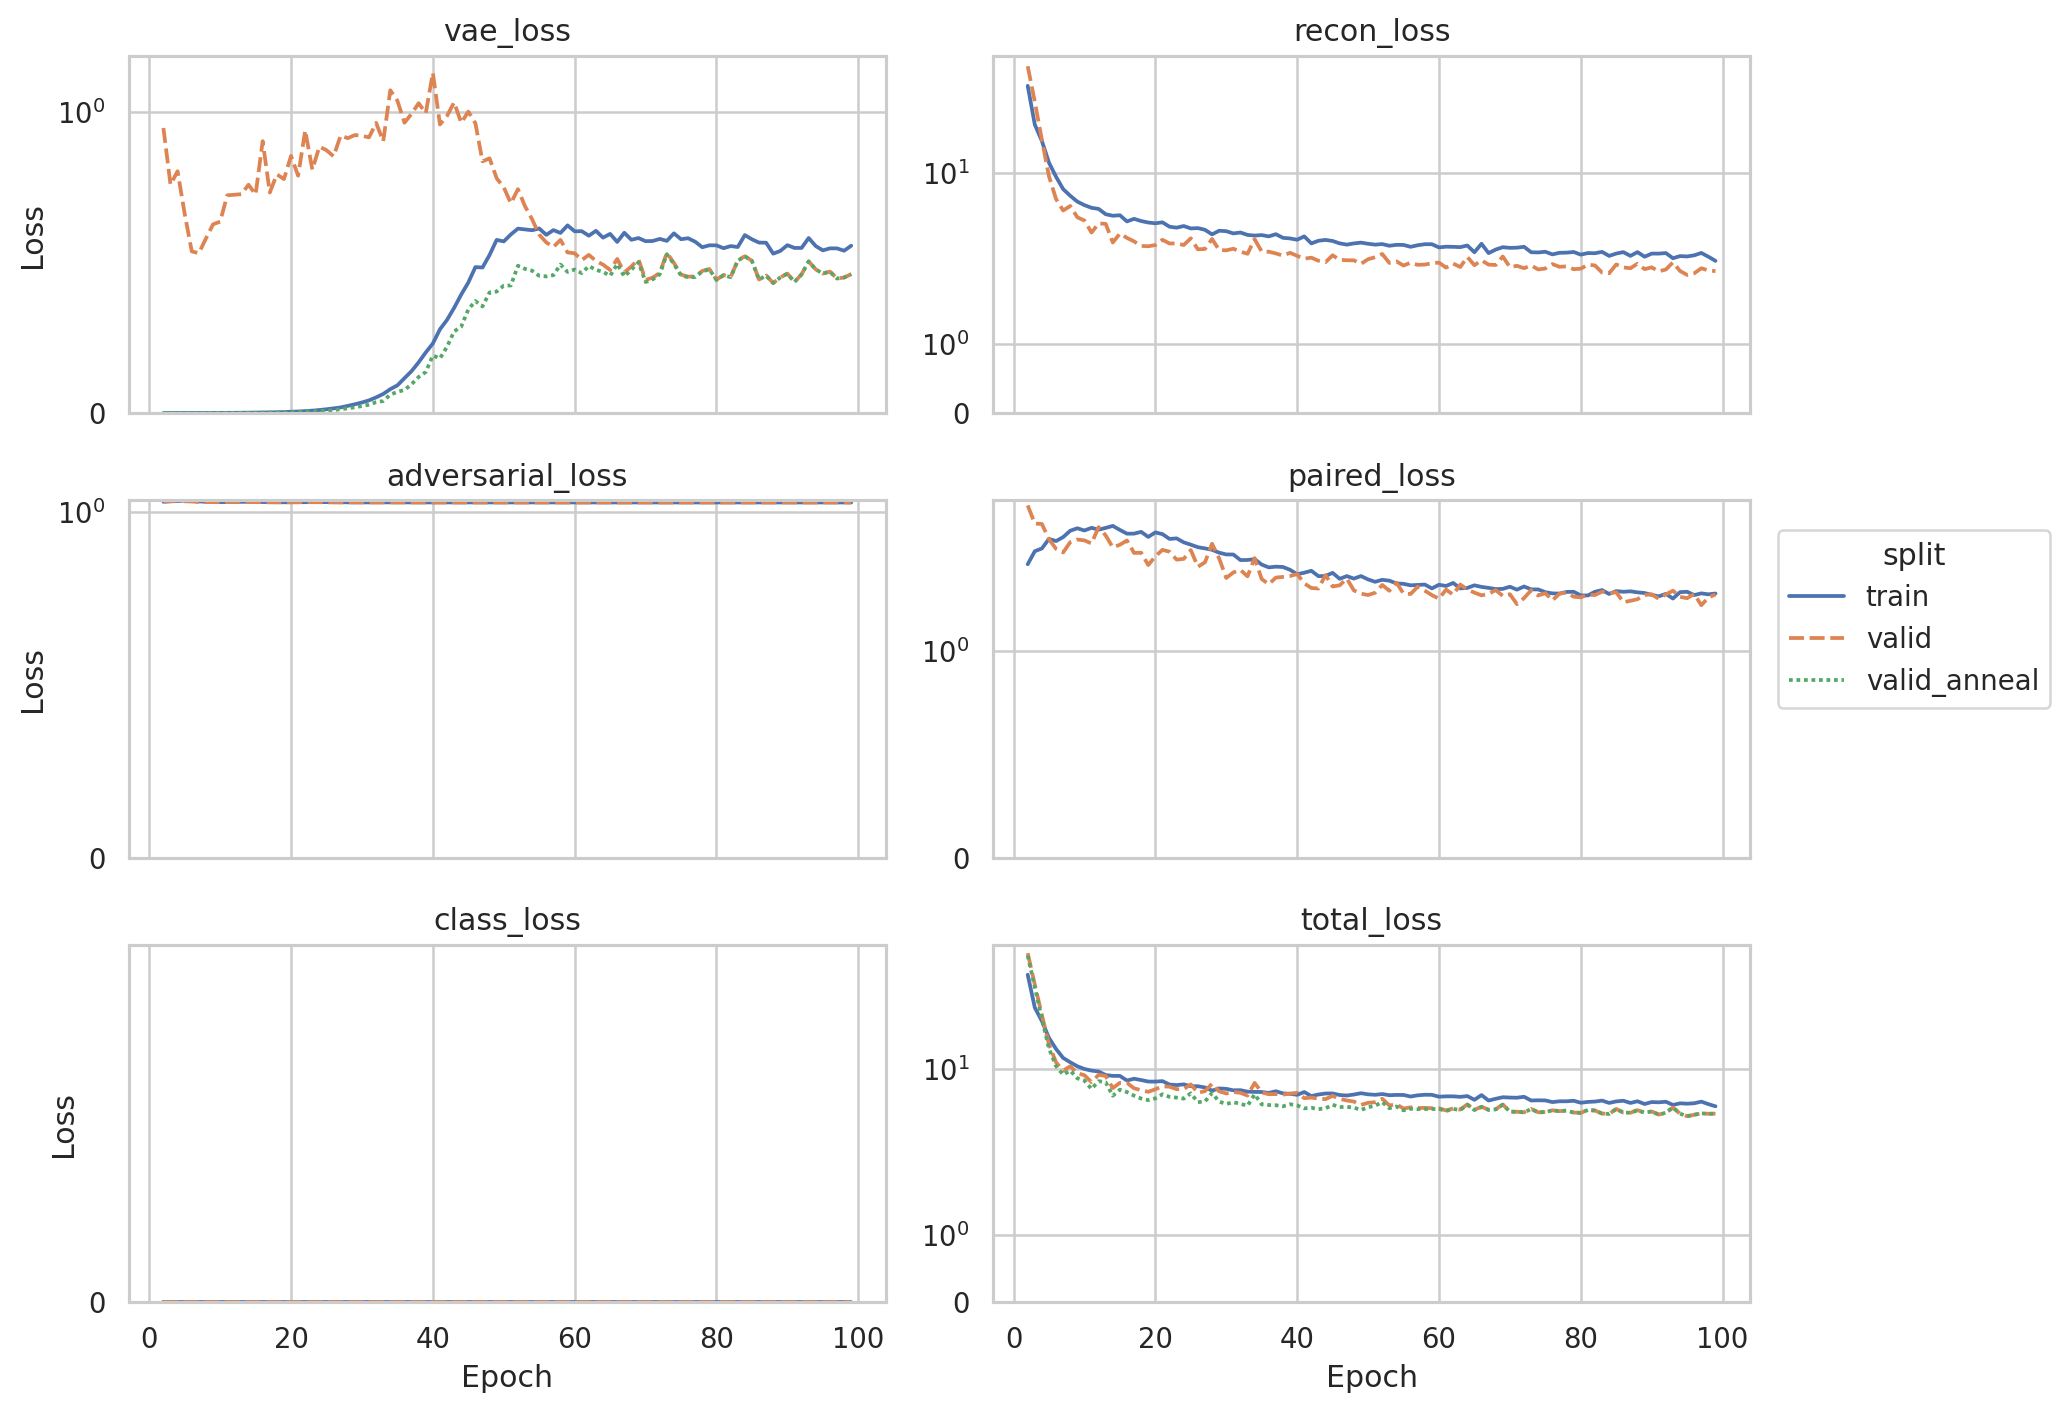

Relative contribution of loss terms to total loss


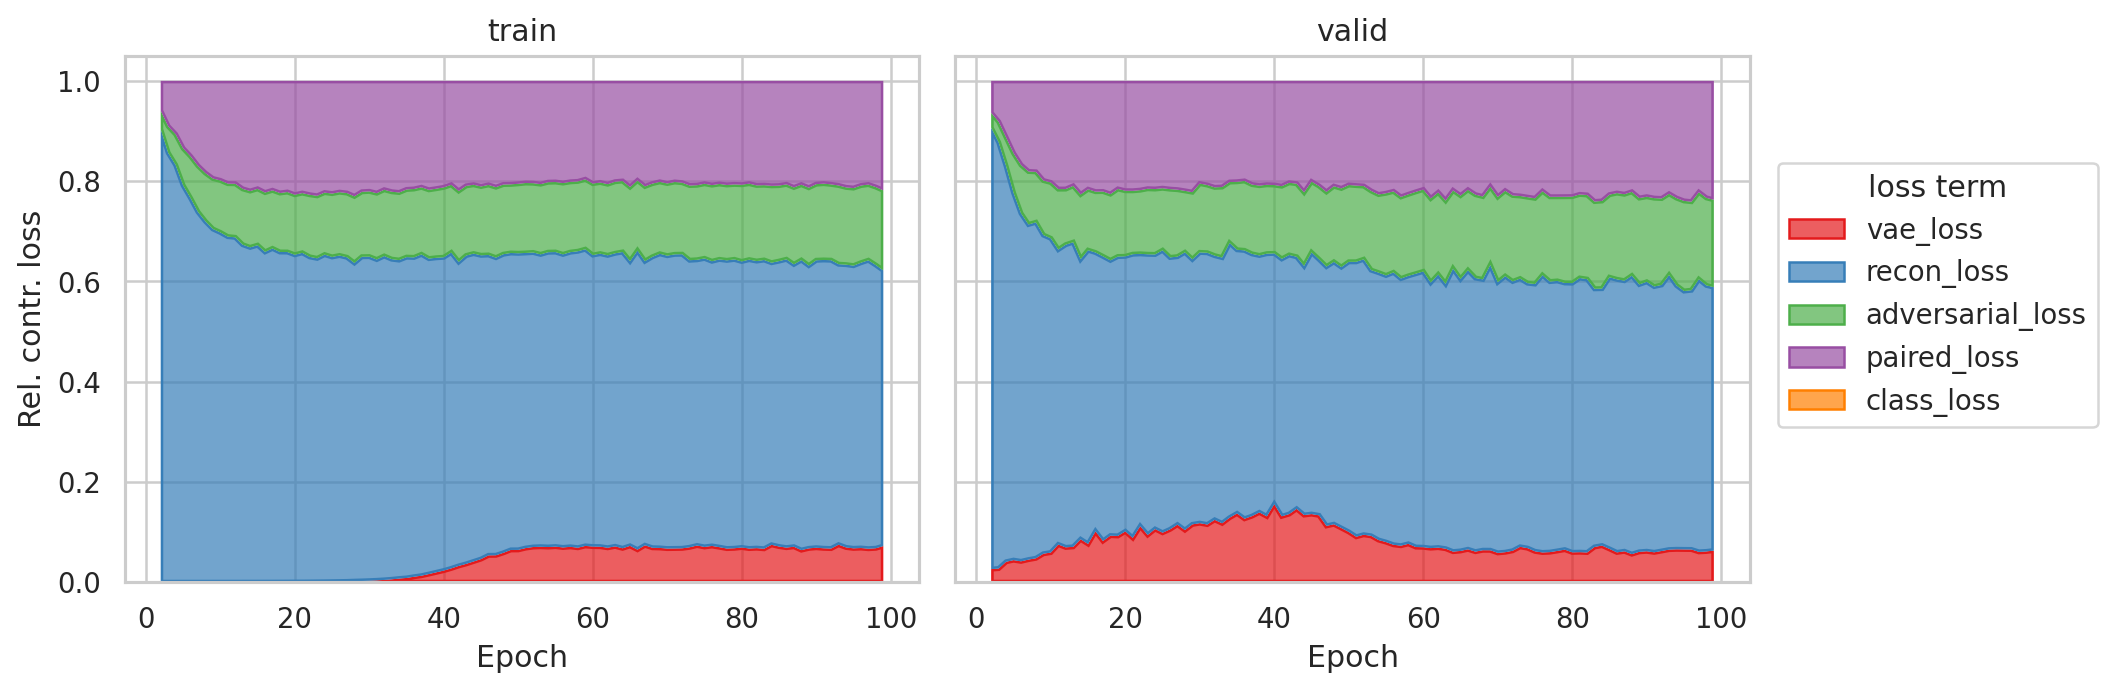

In [10]:
from IPython.display import Image
from IPython.display import display

loss_absolute = Image(filename='reports/getting_started/figures/loss_plot_absolute.png', width=800)
loss_relative = Image(filename='reports/getting_started/figures/loss_plot_relative.png', width=800)

print("Loss curves on log-scale")
display(loss_absolute)
print("Relative contribution of loss terms to total loss")
display(loss_relative)

#### 2D Latent space representation
Let's check if latent spaces of each data modality (proteomics - `FROM` and image `TO`) are well aligned to enable translation.
For that we can look at a 2D UMAP representation of both 32-dimensional latent spaces.

2D latent space representation


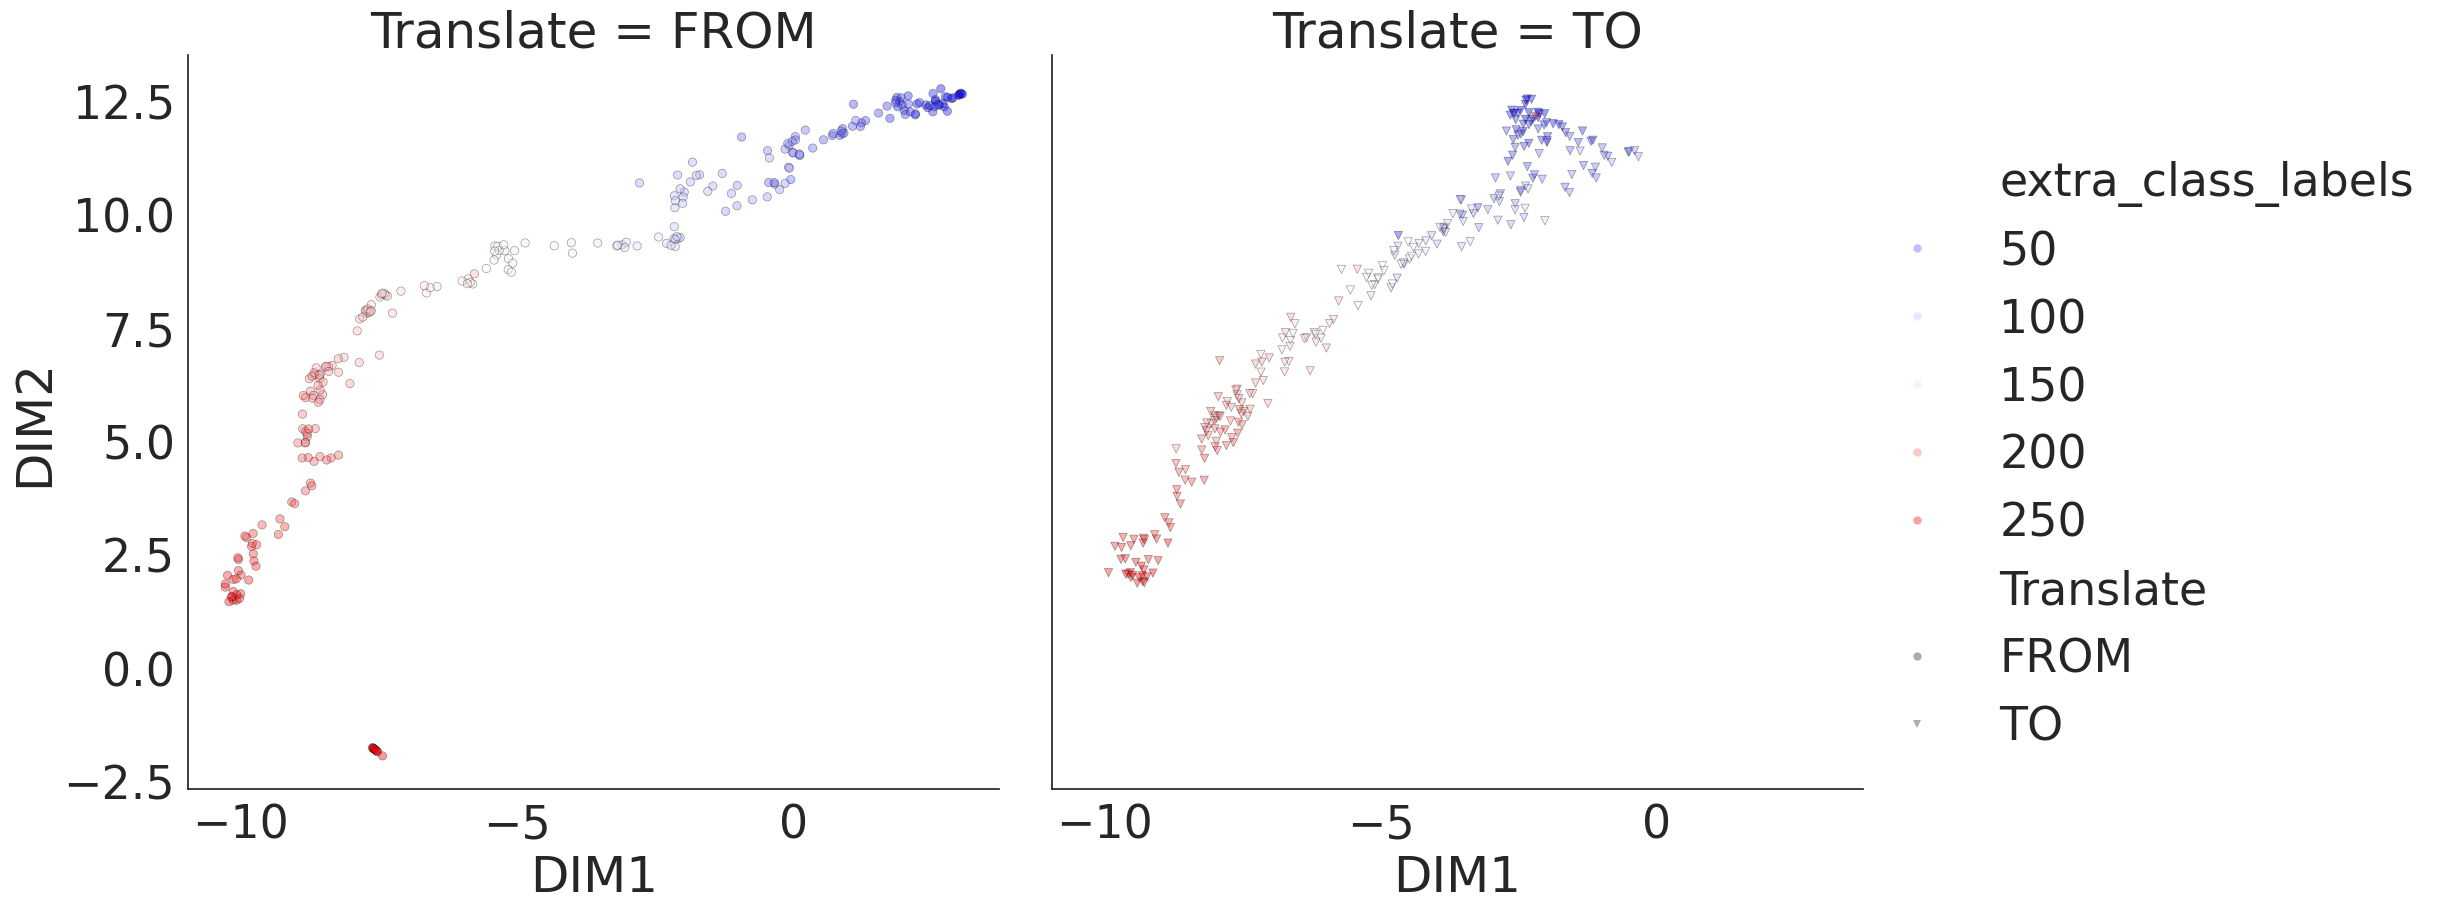

In [11]:
latent_2D = Image(filename='reports/getting_started/figures/latent2D_Aligned_extra_class_labels.png', width=1200)

print("2D latent space representation")
display(latent_2D)

Both latent spaces look fairly aligned across the timepoints (`extra_class_labels`) and translation from proteomic signal to images of C. elegans embryos should work. 

Let's have a look at the translated and reconstructed images. In the grid test samples and respective latent space midpoints are shown for fourth quarters of timepoints (early to late).

Grid of translated images from center midpoints and test samples


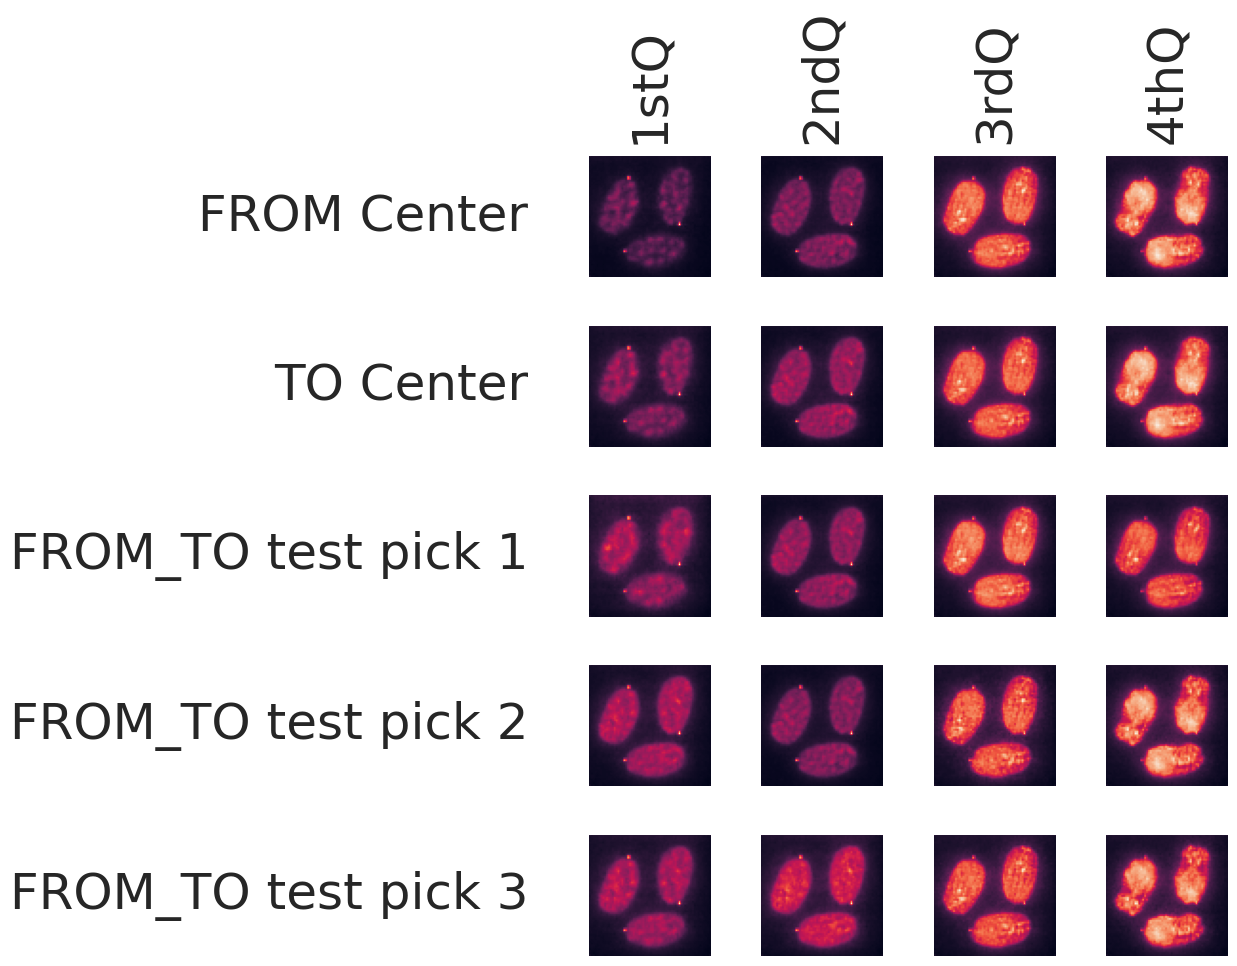

In [18]:
translated_grid = Image(filename='reports/getting_started/figures/translategrid_extra_class_labels.png', width=800)

print("Grid of translated images from center midpoints and test samples")
display(translated_grid)

## 3. How to customize the pipeline
##### This Tutorial should have given you an overview of the functionality of our `AUTOENCODIX`, without the hassle of downloading data or making customizations. However, for real-world use-cases you will likely need to make adjustments. This can be easily done by modifying the config file.

##### We have advanced Notebook Tutorials and extensive documentation that show how to build your own config with own data from scratch. Here, we want to show basic modifications. Let's say you want to:

##### - increase number of epochs
##### - increase pre-training epochs

##### to improve X-Modalix training.

##### We will overwrite these two parameters in the config and save the config under our new RUN_ID `my_getting_started`

In [15]:
import yaml

CFG_PATH = os.path.join("Tutorials/TutorialData/getting_started_config.yaml") ## Read in previous config
CFG = yaml.safe_load(open(CFG_PATH, "r"))
print(f"Configuration loaded from {CFG_PATH}")

MY_CFG = CFG.copy()
MY_CFG["EPOCHS"] = 200 # Change number of epochs
MY_CFG["PRETRAIN_EPOCHS"] = 100
with open("my_getting_started_config.yaml", "w") as f: # Save new config
    yaml.dump(MY_CFG, f)

Configuration loaded from Tutorials/TutorialData/getting_started_config.yaml


#### Now we can easily re-run the X-modalix training for the new config.

In [16]:
! make visualize RUN_ID=my_getting_started

mkdir -p data/processed
mkdir -p data/raw
mkdir -p data/raw/images
mkdir -p reports
mkdir -p reports/figures
mkdir -p models
mkdir -p models/tuning/my_getting_started
mkdir -p data/interim/my_getting_started
mkdir -p data/processed/my_getting_started
mkdir -p models/my_getting_started
mkdir -p models/tuned/my_getting_started
mkdir -p reports/my_getting_started
mkdir -p reports/my_getting_started/figures
# check if run_id_config.yaml exists
# if not, copy config.yaml to run_id_config.yaml
# if yes copy the existing run_id_config.yaml to reports/my_getting_started/my_getting_started_config.yaml
if [ ! -f my_getting_started_config.yaml ]; then \
	# sed -i '' '/RUN_ID/d' config.yaml; \
	sed -i '/RUN_ID/d' config.yaml; \
	echo "RUN_ID: my_getting_started" >> config.yaml; \
	cp config.yaml reports/my_getting_started/my_getting_started_config.yaml; \
fi
if [ -f my_getting_started_config.yaml ]; then \
	# sed -i '' '/RUN_ID/d' my_getting_started_config.yaml; \
	sed -i '/RUN_ID/d' my_getting_st

#### Investigation of latent space after longer training:


2D latent space representation


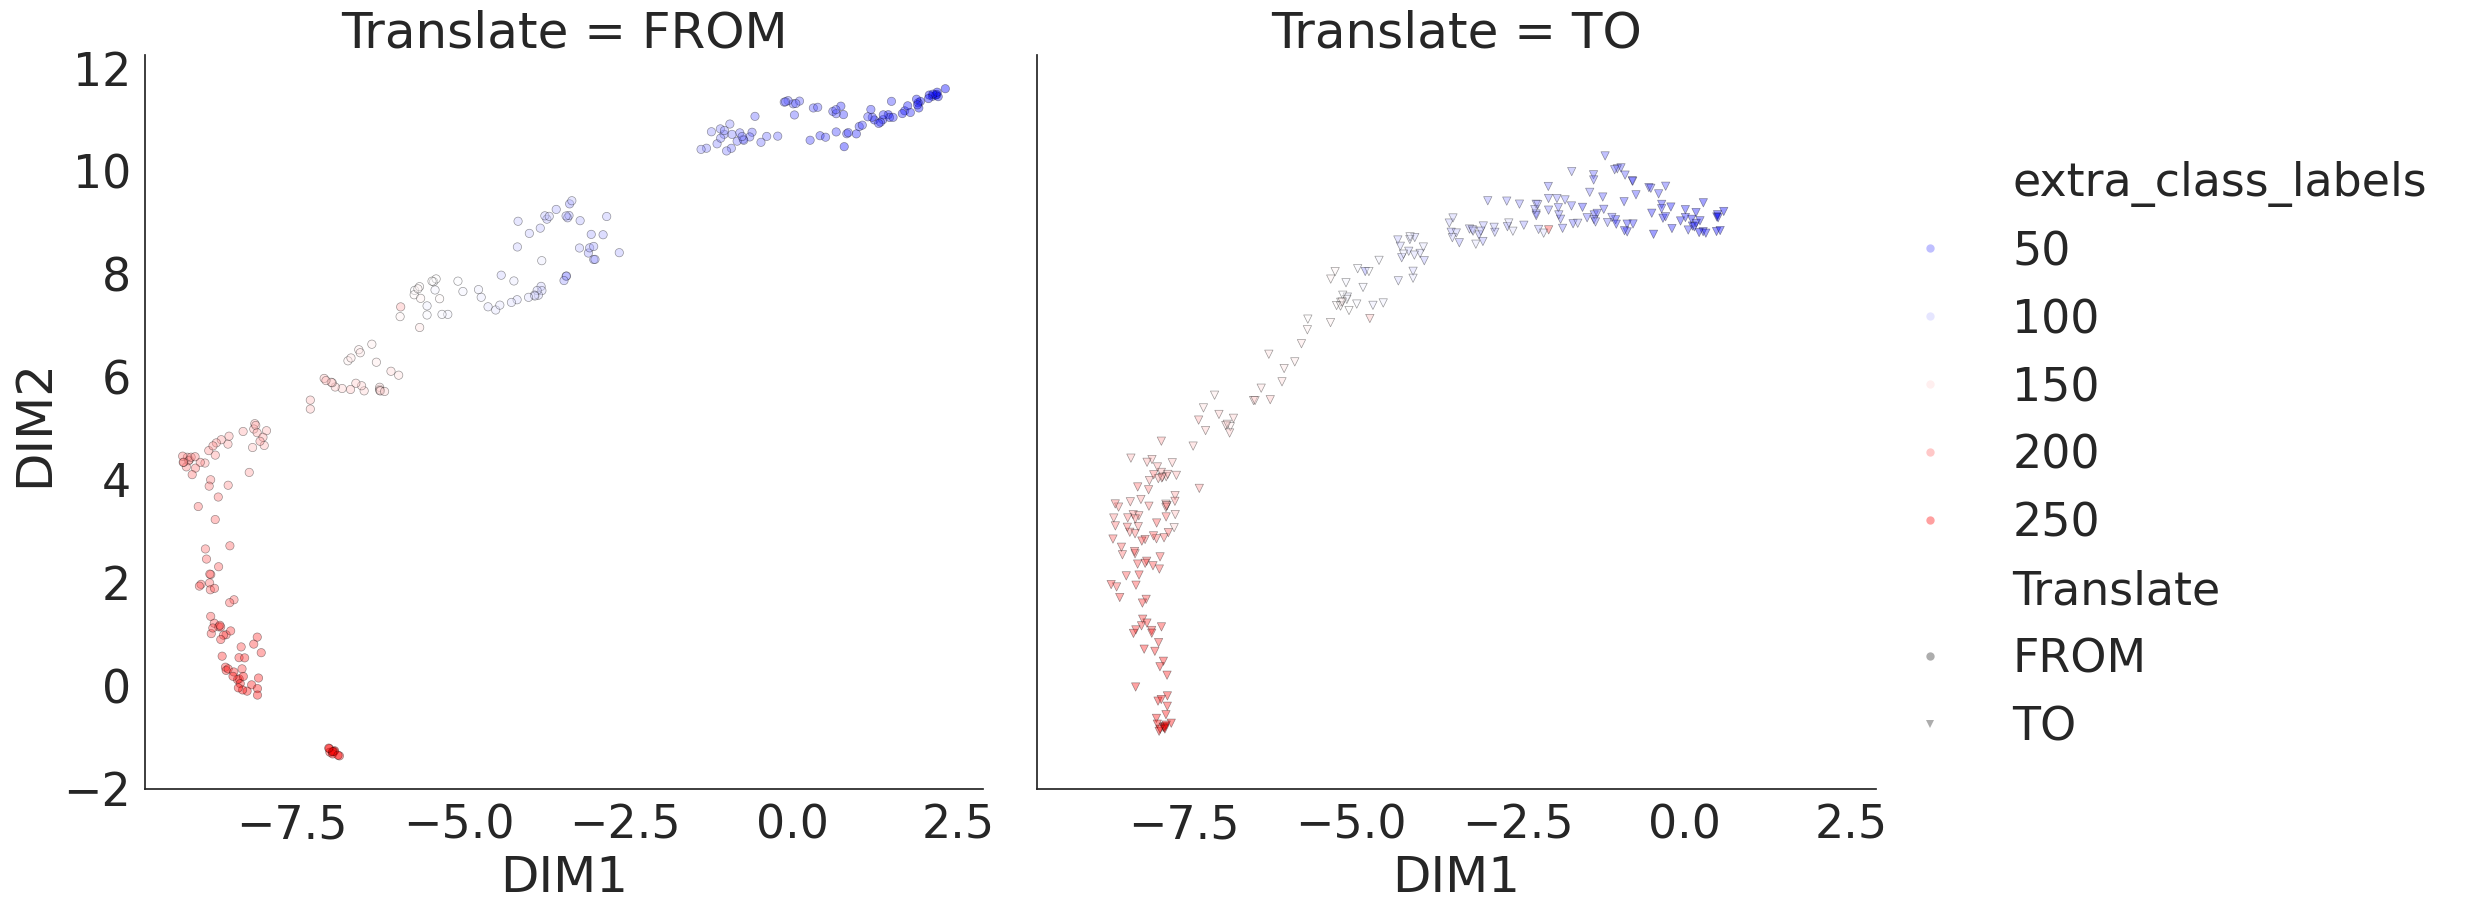

In [17]:
latent_2D = Image(filename='reports/my_getting_started/figures/latent2D_Aligned_extra_class_labels.png', width=1200)

print("2D latent space representation")
display(latent_2D)

## Next Steps
Here we showed the basic function of Autoencodix. If you want to learn how to use Autoencodix with your data, or get more technical information, you might consider the following Tutorials:
#### - How to Set-up your data for Autoencodix: `Setup_InputFormat.ipynb`
#### - How to train a normal VAE and generate a config: `Basics_Autoencodix.ipynb`
#### - How to train a explainable autoencoder with your ontologies: `Advanced_Ontix.ipynb`
#### - How to use Autoencodix with h5ad Single Cell Data: `Basics_single-cell.ipynb`
#### - Get more information about the each step in the pipeline and cross modale auteoncoders: `Advanced_Xmodalix.ipynb`

or write us an issue if you have problems or if you need additional features.

## References
```
Citation: Ma, X., Zhao, Z., Xiao, L. et al. A 4D single-cell protein atlas of transcription factors delineates spatiotemporal patterning during embryogenesis. Nat Methods 18, 893–902 (2021). https://doi.org/10.1038/s41592-021-01216-1
```